In [1]:
import sys
sys.path.append('../')
from _imports import *

In [2]:
train_X = pd.read_csv('../data/preprocess/train_X.csv').to_numpy()
test_X = pd.read_csv('../data/preprocess/test_X.csv').to_numpy()
train_y = pd.read_csv('../data/preprocess/train_y.csv').iloc[:, 0].to_numpy()

In [3]:
# THESE are not important, only for plotting:
# (can be generated using a simple rf model for example)

train_y_pred = pd.read_csv('../data/predict/train_y.csv').to_numpy()
test_y_pred = pd.read_csv('../data/predict/test_y.csv').to_numpy()

In [4]:
keras.utils.set_random_seed(110)

n_features = train_X.shape[1]
num_features = 32 + 21
bin_features = n_features - num_features

input = keras.layers.Input(shape=(n_features,), name="input")
hidden1 = keras.layers.Dense(
  250, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden1",
)(input)
hidden2 = keras.layers.Dense(
  25, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden2",
)(hidden1)
hidden3 = keras.layers.Dense(
  2, activation="sigmoid",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden3",
)(hidden2)
hidden4 = keras.layers.Dense(
  25, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden4",
)(hidden3)
hidden5 = keras.layers.Dense(
  250, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden5",
)(hidden4)
output1 = keras.layers.Dense(num_features, activation="linear", name="output1")(hidden5)
output2 = keras.layers.Dense(bin_features, activation="sigmoid", name="output2")(hidden5)
output3 = keras.layers.Dense(1, activation="linear", name="output3")(hidden5)
model = keras.Model(inputs=input, outputs=[output1, output2, output3], name="model")

model.compile(
    loss=[keras.losses.MeanSquaredError(name="MSE"), keras.losses.BinaryCrossentropy(name="CEN"), keras.losses.MeanSquaredError(name="MSE")],
    optimizer=keras.optimizers.Adam(),
    loss_weights=[1, 1, 0.25],
)

history = model.fit(
    train_X,
    [train_X[:, :num_features], train_X[:, num_features:], train_y],
    epochs=10,
);

print("train:", model.evaluate(
  train_X,
  [train_X[:, :num_features], train_X[:, num_features:], train_y],
  verbose=0,
))

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 1.9888 - output1_loss: 1.0435 - output2_loss: 0.6385 - output3_loss: 0.2157
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.2751 - output1_loss: 0.8951 - output2_loss: 0.2530 - output3_loss: 0.0588
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1843 - output1_loss: 0.9170 - output2_loss: 0.1857 - output3_loss: 0.0318
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0927 - output1_loss: 0.8445 - output2_loss: 0.1791 - output3_loss: 0.0257
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0401 - output1_loss: 0.8076 - output2_loss: 0.1734 - output3_loss: 0.0195
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0312 - output1_loss: 0.8026 - output2_loss: 0.1738 - output3_loss: 0.0177
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0845 - output1_loss: 0.8614 - output2_loss: 0.1715 - output3_loss: 0.0159
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0

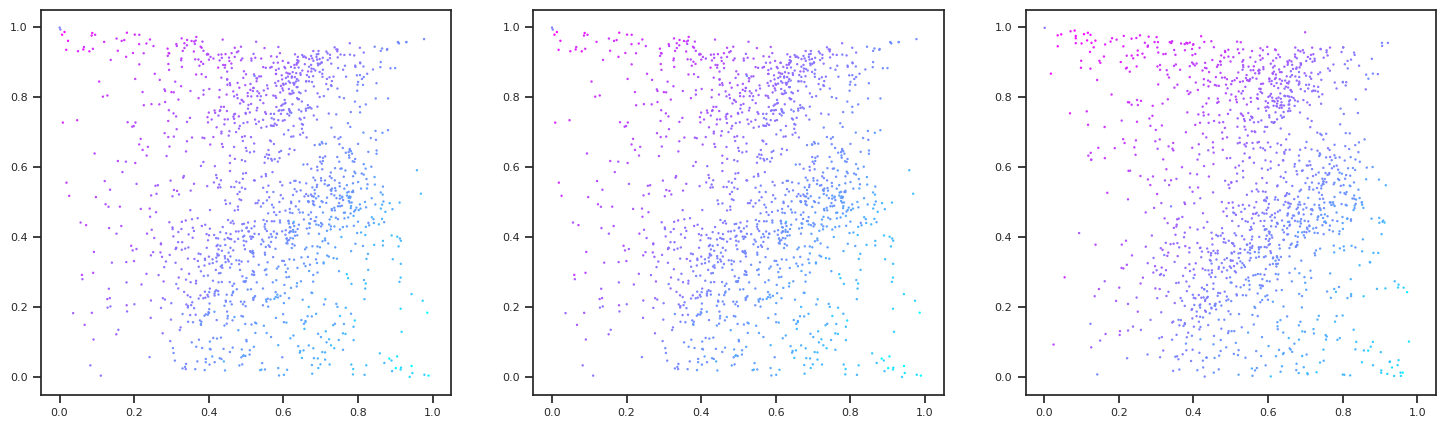

In [5]:
m1 = keras.Model(input, hidden3)

Z = m1.predict(train_X, verbose=0)
Zt = m1.predict(test_X, verbose=0)

plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
plt.scatter(Z[:,0], Z[:,1], s=2, c=train_y, cmap="cool", marker=".")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.subplot(1,3,2)
plt.scatter(Z[:,0], Z[:,1], s=2, c=train_y_pred, cmap="cool", marker=".")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.subplot(1,3,3)
plt.scatter(Zt[:,0], Zt[:,1], s=2, marker=".", c=test_y_pred, cmap="cool")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.show()

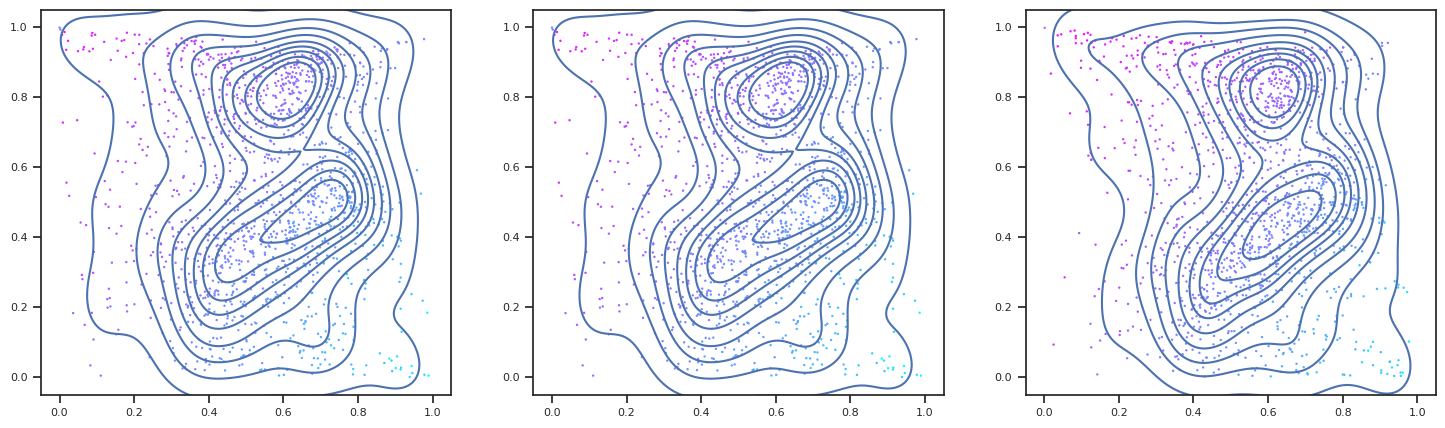

In [6]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
plt.scatter(Z[:,0], Z[:,1], s=2, c=train_y, cmap="cool", marker=".")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
sns.kdeplot(x=Z[:,0], y=Z[:,1])
plt.subplot(1,3,2)
plt.scatter(Z[:,0], Z[:,1], s=2, c=train_y_pred, cmap="cool", marker=".")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
sns.kdeplot(x=Z[:,0], y=Z[:,1])
plt.subplot(1,3,3)
plt.scatter(Zt[:,0], Zt[:,1], s=2, marker=".", c=test_y_pred, cmap="cool")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
sns.kdeplot(x=Zt[:,0], y=Zt[:,1])
plt.show()

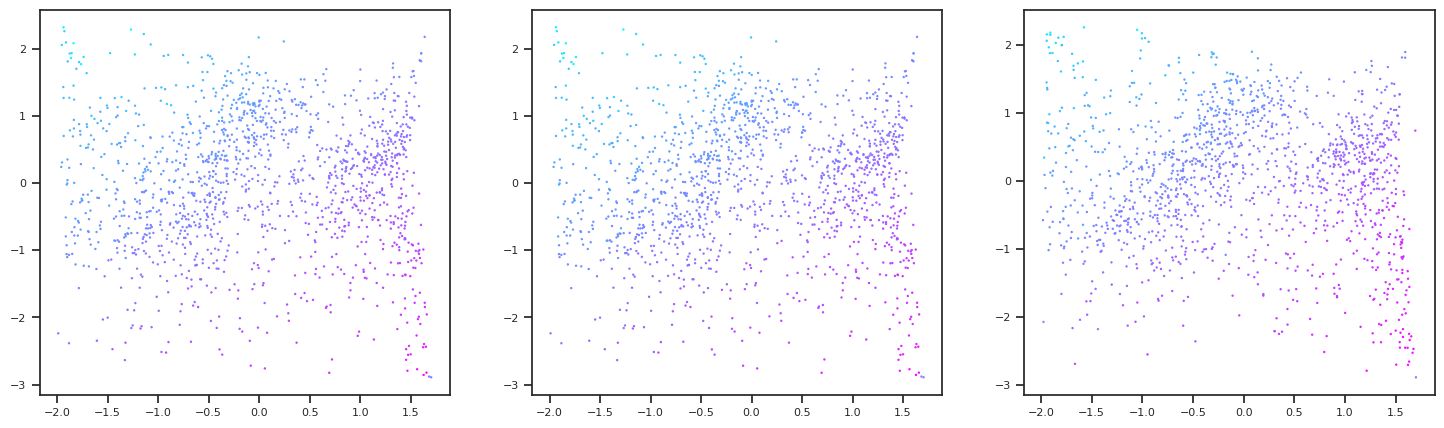

In [12]:
pca = PCA(n_components=2, whiten=True, random_state=1)
Zp = pca.fit_transform(Z)
Ztp = pca.transform(Zt)

plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
plt.scatter(Zp[:,0], Zp[:,1], s=2, c=train_y, cmap="cool", marker=".")
plt.subplot(1,3,2)
plt.scatter(Zp[:,0], Zp[:,1], s=2, c=train_y_pred, cmap="cool", marker=".")
plt.subplot(1,3,3)
plt.scatter(Ztp[:,0], Ztp[:,1], s=2, c=test_y_pred, cmap="cool", marker=".")
plt.show()

Some Analysis:

In [8]:
bare_train_X = pd.read_csv('../input/train.csv').drop(columns="SalePrice")
bare_test_X = pd.read_csv('../input/test.csv')

In [9]:
names = pd.Series(np.hstack([bare_train_X["Neighborhood"], bare_test_X["Neighborhood"]])).value_counts().index.tolist()

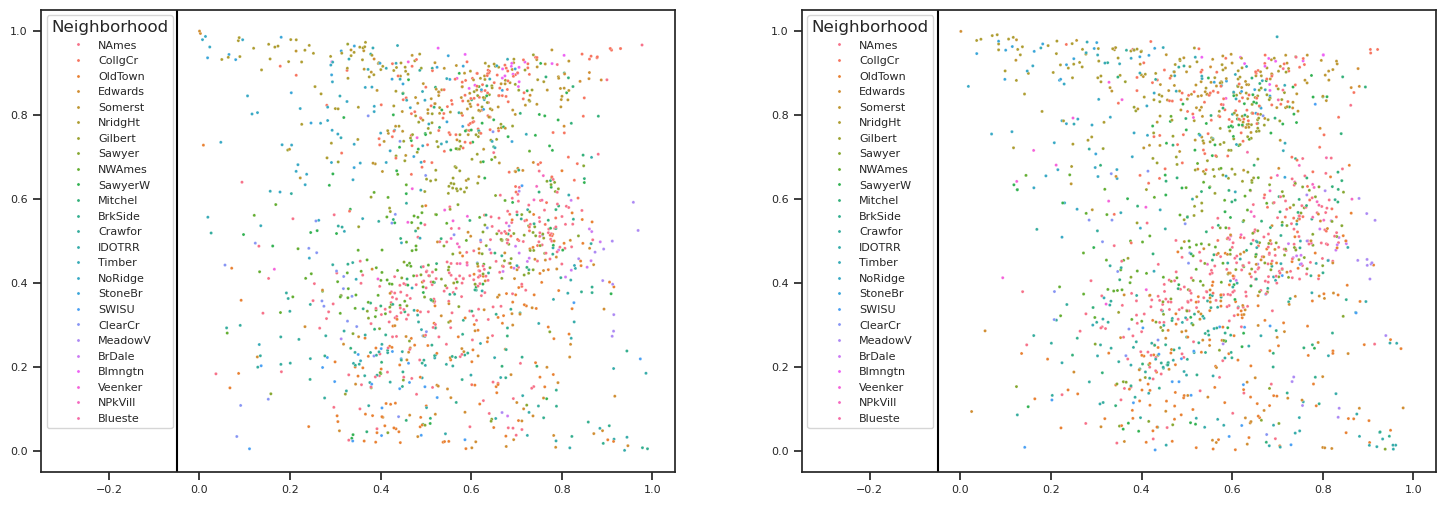

In [10]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.scatterplot(x=Z[:,0], y=Z[:,1], s=5, hue=bare_train_X["Neighborhood"], hue_order=names)
plt.xlim(-0.35, 1.05)
plt.ylim(-0.05, 1.05)
plt.plot([-0.05, -0.05], [-0.05, 1.05], c="black")
plt.subplot(1,2,2)
sns.scatterplot(x=Zt[:,0], y=Zt[:,1], s=5, hue=bare_test_X["Neighborhood"], hue_order=names)
plt.xlim(-0.35, 1.05)
plt.ylim(-0.05, 1.05)
plt.plot([-0.05, -0.05], [-0.05, 1.05], c="black")
plt.show()